# Illustrasjoner

## helse, politikk, kultur, samfunn

In [2]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import dhlab.module_update as mu
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mu.css()

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt


In [6]:
plt.rcParams.update({'font.size': 14})

In [10]:
ngram = lambda x, smooth=2, media='avis', alpha=0.7, period=(1950,2000): nb.nb_ngram(x, corpus = media,smooth=smooth, years= period).plot(lw=5, title = x + "-" + media, figsize=(12,7), alpha=alpha);

In [23]:
dfngram = lambda x, smooth=2, media='avis', period=(1950,2000): nb.nb_ngram(x, corpus = media,smooth=smooth, years= period)
nplot = lambda df,axis, alpha=0.7: df.plot(ax = axis, lw=5, figsize=(12,7), alpha=alpha);

# helse, kultur, politikk, samfunn

### Fra NB N-gram

Hovedeffekten av ordet 'helse' ser ut til å slå inn etter 2000. Men klar trend oppover sammen med kultur fra 1980

In [25]:
words = "helse, frisk, syk, sykdom, kultur, politikk, samfunn".split(', ')
trans = "health, healthy, sick, illness, culture, politics, society".split(', ')

In [30]:
transwords = dict(list(zip(words, trans)))

In [33]:
transwords

{'helse': 'health',
 'frisk': 'healthy',
 'syk': 'sick',
 'sykdom': 'illness',
 'kultur': 'culture',
 'politikk': 'politics',
 'samfunn': 'society'}

['helse', 'syk', 'frisk', 'sykdom']


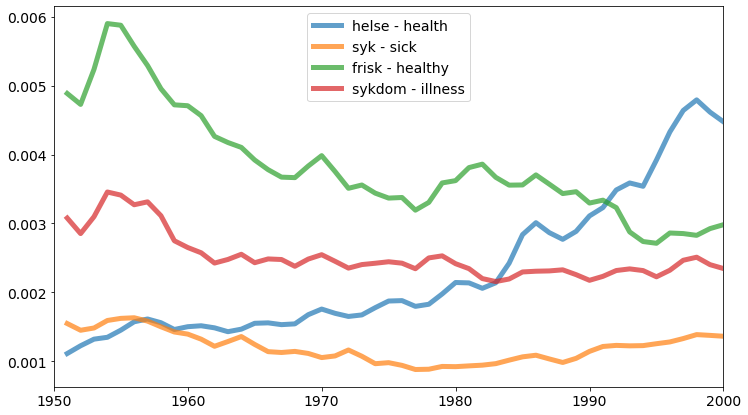

In [50]:
fig, ax = plt.subplots()
df = dfngram('helse, syk, frisk, sykdom')
nplot(df, ax)
L = ax.legend()
words = [x.get_text() for x in list(L.get_texts())]
print(words)
ax.legend([word + ' - ' + transwords[word] for word in words])

['helse', 'kultur', 'politikk', 'samfunn']


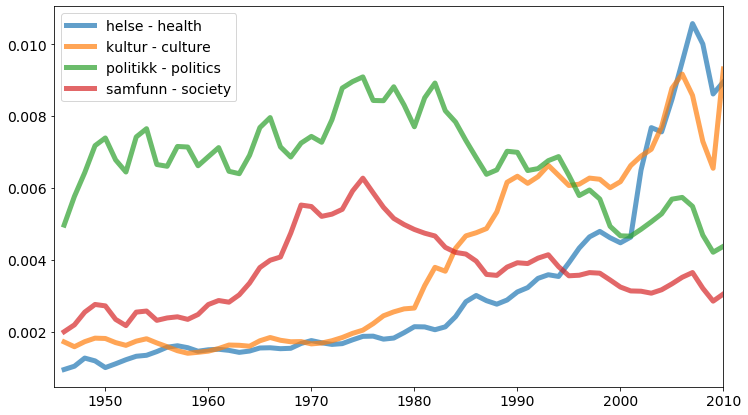

In [52]:
fig, ax = plt.subplots()
df = dfngram('helse, kultur, politikk, samfunn', period=(1945, 2010))
nplot(df, ax)
L = ax.legend()
words = [x.get_text() for x in list(L.get_texts())]
print(words)
ax.legend([word + ' - ' + transwords[word] for word in words])

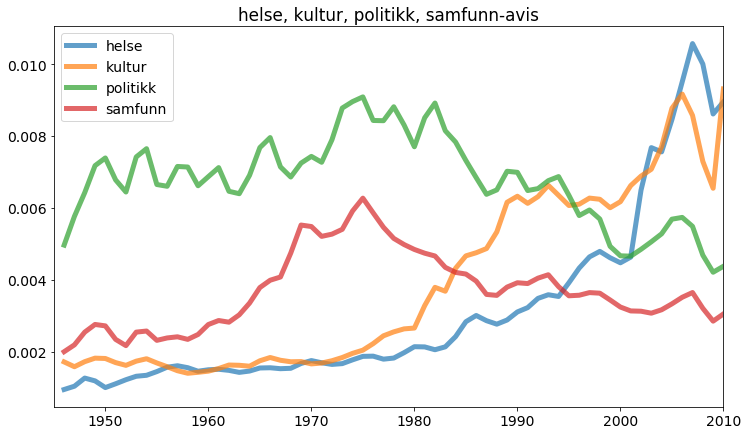

In [11]:
ngram("helse, kultur, politikk, samfunn", period=(1945, 2010))

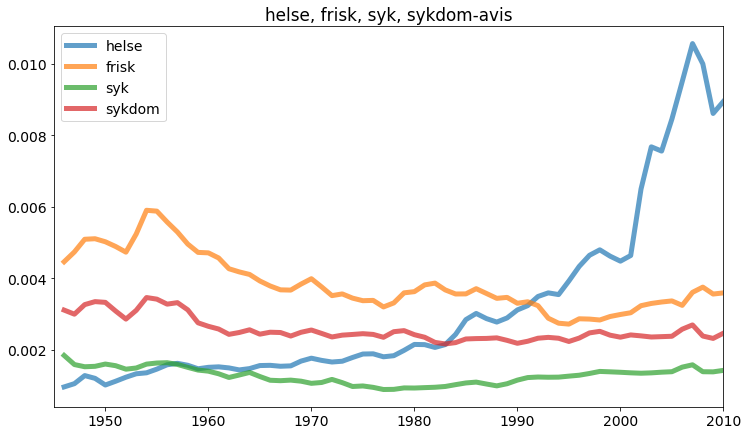

In [14]:
ngram("helse, frisk, syk, sykdom", period=(1945, 2010))

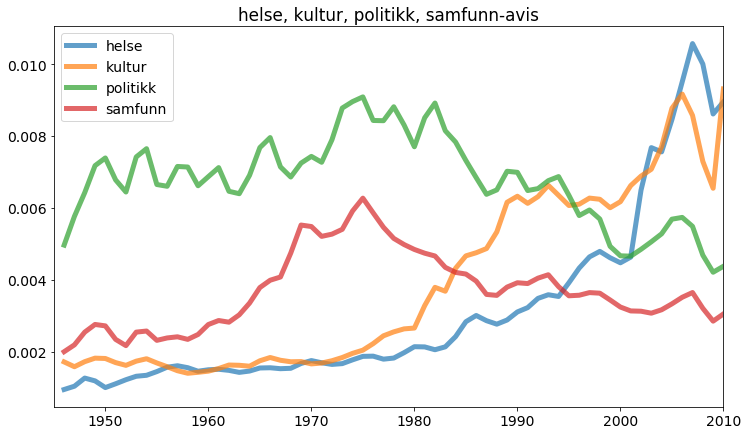

In [13]:
ngram("helse, kultur, politikk, samfunn", media='avis', period=(1945, 2010))

# Trendlinjer med unigram fra fulltekst-data

Linjene er relativisert til summen av punktum, kommma og 'og' - alle plot fra aviser. Trendlinjen er litt mer moderat mot slutten av perioden. 


In [9]:
def unigram_agg(words, media='avis', period=(1950, 2000)):
    return pd.concat([nb.frame(nb.unigram(word, media=media, period=period), word) for word in words], axis=1).sum(axis=1)

In [10]:
agg = nb.frame(unigram_agg(". , og".split()), 'tot')

In [11]:
def unigrams(words, media = 'avis', period=(1950, 2000)):
    return  pd.concat([nb.frame(nb.unigram(word, media=media, period=period), word) for word in words], axis=1)

In [12]:
def unigrams_rel(words, media = 'avis', period= (1950, 2000), rel=agg.tot):
    unis = pd.concat([nb.frame(nb.unigram(word, media=media, period=period), word) for word in words], axis=1)
    return  nb.frame({x: unis[x]/rel for x in unis}).transpose()

In [13]:
hsf_rel = unigrams_rel('helse syk sykdom frisk'.split(), media='avis', period=(1950, 2000))

In [14]:
post_war = (1950, 2010)
Helse = nb.frame(unigram_agg('Helse helse'.split(), media='avis', period = post_war), 'helse')
Kultur = nb.frame(unigram_agg("kultur helse".split(), media = 'avis', period = post_war), 'kultur')
Politikk = nb.frame(unigram_agg('politikk Politikk'.split(), media='avis', period= post_war), 'politikk')
Samfunn = nb.frame(unigram_agg('samfunn Samfunn'.split(), media = 'avis', period= post_war), 'samfunn')


In [16]:
agg0 = nb.frame(unigram_agg(". , og".split(), period=(1950, 2010)), 'tot')

In [17]:

hps_rel = unigrams_rel('helse kultur politikk samfunn'.split(), media='avis', period=(1950, 2010), rel = agg0.tot)

In [18]:

hps_rel_cap = unigrams_rel('Helse Kultur Politikk Samfunn'.split(), media='avis', period=(1950, 2010), rel = agg0.tot)

In [19]:
def relativise(trends, rel = agg0.tot):
    return pd.concat([nb.frame(trend[trend.columns[0]]/rel, trend.columns[0]) for trend in trends], axis=1)

In [20]:
helges = relativise([Helse, Kultur, Politikk, Samfunn], agg0.tot)

Kurver med både stor og liten bokstav, kurvene er relative til summen av punktum, komma og 'og'.

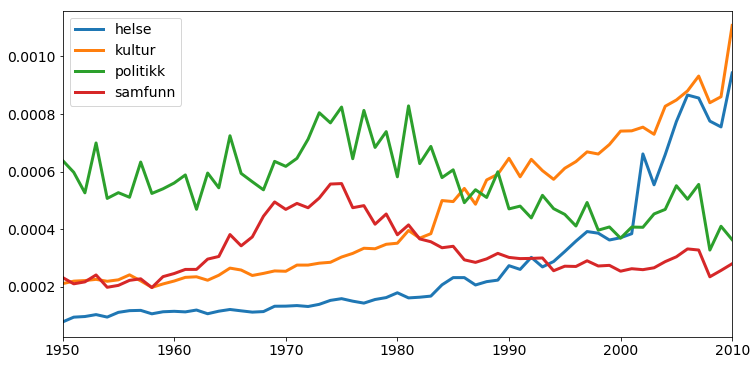

In [21]:
helges.plot(lw=3, figsize=(12,6))

# med bare små bokstaver.

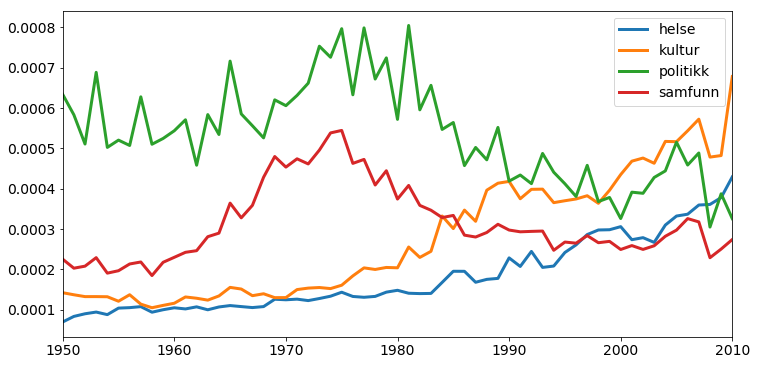

In [22]:
hps_rel.plot(lw=3, figsize=(12,6))

# Med bare store

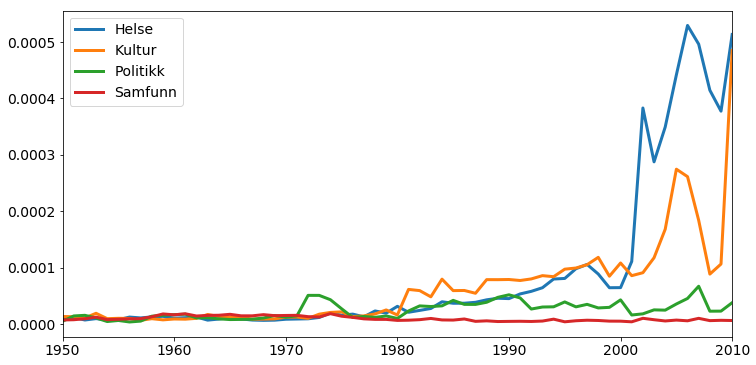

In [23]:
hps_rel_cap.plot(lw=3, figsize=(12,6))